In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df = pd.read_csv("Salary_Data_Cleaned.csv")

In [154]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,average_salary,company_txt,job_state,same_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,48,1,1,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,37,1,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,11,1,1,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,56,1,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,23,1,1,0,0,1


In [155]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [156]:
def title_simplifier(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "analyst" in title.lower():
        return "analyst"
    elif "machine learning enginner" in title.lower():
        return "mle"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "na"
    

def seniority(title):
    if "sr" in title.lower() or "senior" in title.lower() or "lead" in title.lower() or "principal" in title.lower():
        return "senior"
    elif "jr" in title.lower() or "junior" in title.lower() or "jr." in title.lower():
        return "junior"
    else:
        return "na"

In [157]:
df["job_simp"] = df["Job Title"].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    279
na                206
data engineer     119
analyst           102
manager            22
director           14
Name: job_simp, dtype: int64

In [158]:
df["seniority"] = df["Job Title"].apply(seniority)
df.seniority.value_counts()

na        519
senior    220
junior      3
Name: seniority, dtype: int64

In [177]:
df["job_state"] = df.job_state.apply(lambda x: x.strip() if x != "Los Angeles" else "CA")
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
UT     10
IN     10
WI     10
MO      9
AZ      9
AL      8
KY      6
GA      6
MI      6
DE      6
IA      5
CT      5
OR      4
LA      4
NE      4
KS      3
NM      3
MN      2
ID      2
SC      1
RI      1
Name: job_state, dtype: int64

In [160]:
# Job Description Length

df["desc_len"] = df["Job Description"].apply(lambda x: len(x))
df.desc_len

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [161]:
#Competitors count
df["num_comp"] = df["Competitors"].apply(lambda x: len(x.split(',')) if x != "-1" else 0)
df.num_comp

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [162]:
#Hour Wage to Annual

df["min_salary"] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis =1)
df["max_salary"] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis =1)
df.min_salary

0      53
1      63
2      80
3      56
4      86
       ..
737    58
738    72
739    56
740    95
741    61
Name: min_salary, Length: 742, dtype: int64

In [163]:
df[df.hourly == 1][["hourly", "min_salary", "max_salary"]]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [164]:
df.company_txt = df.company_txt.apply(lambda x: x.replace("\n", ""))
df.company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [165]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,same_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,1.0,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.0,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,1.0,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,1.0,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,1.0,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,1.0,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.0,1.000000,1.000000,1.000000,10051.000000,4.000000


In [166]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

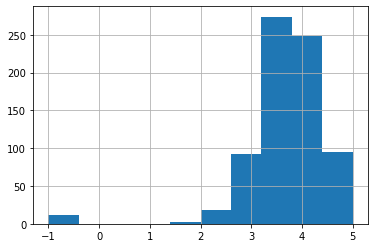

In [167]:
df.Rating.hist()

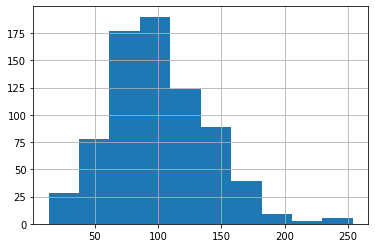

In [168]:
df.average_salary.hist()

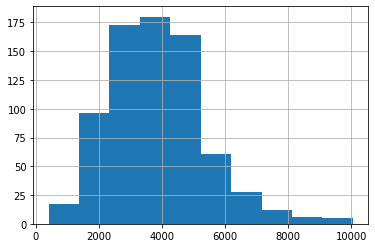

In [169]:
df.desc_len.hist()

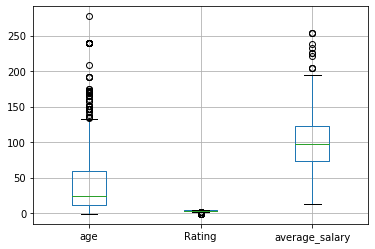

In [170]:
df.boxplot(column = ["age", "Rating","average_salary"])

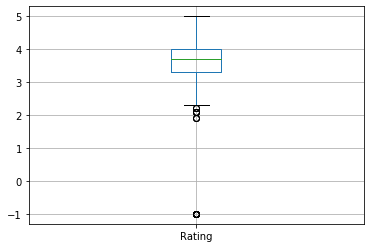

In [171]:
df.boxplot(column = "Rating")

In [172]:
correlation = df[["age", "desc_len","Rating","average_salary"]].corr()
correlation

,age,desc_len,Rating,average_salary
age,1.000000,0.164188,0.023162,0.019574
desc_len,0.164188,1.000000,-0.012281,0.078808
Rating,0.023162,-0.012281,1.000000,0.013492
average_salary,0.019574,0.078808,0.013492,1.000000


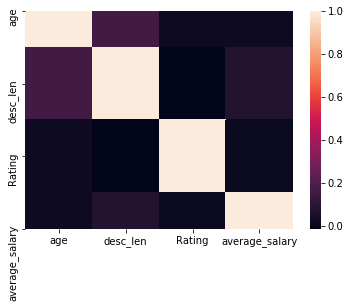

In [173]:
sns.heatmap(correlation)

In [174]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [175]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector','Revenue', 'company_txt', 'job_state', 'same_state','python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority']]

graph for Location; Total = 200


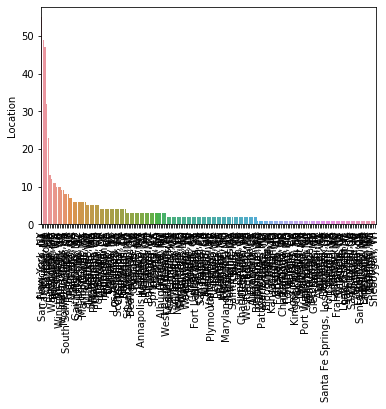

graph for Headquarters; Total = 198


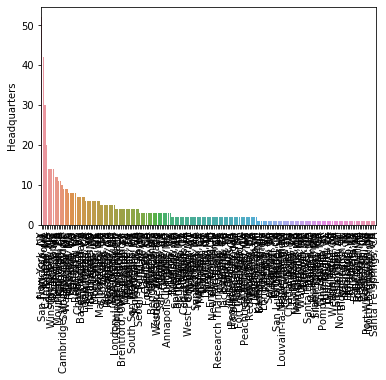

graph for Size; Total = 9


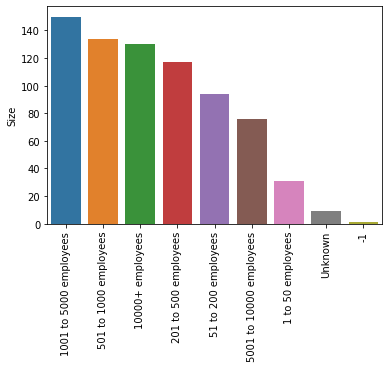

graph for Type of ownership; Total = 11


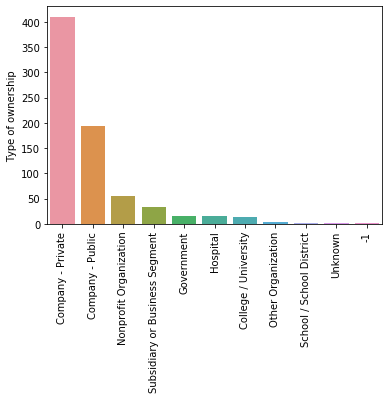

graph for Industry; Total = 60


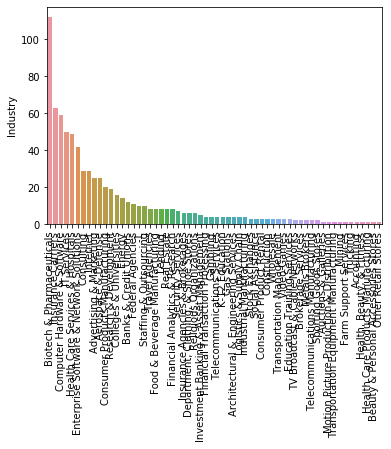

graph for Sector; Total = 25


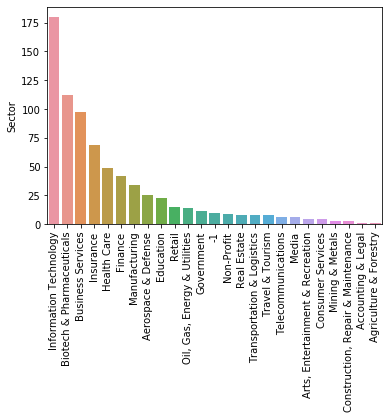

graph for Revenue; Total = 14


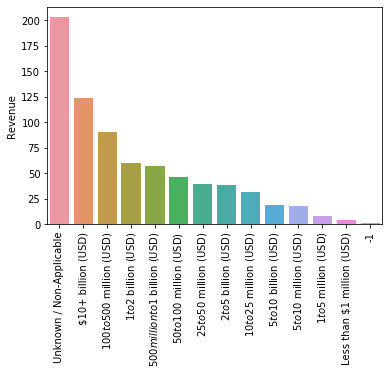

graph for company_txt; Total = 343


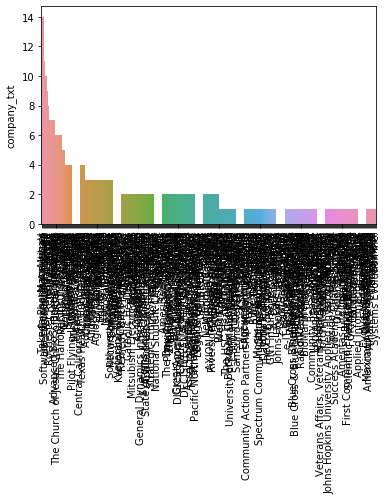

graph for job_state; Total = 38


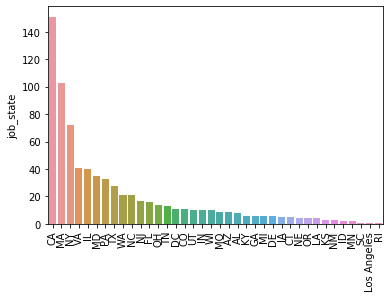

graph for same_state; Total = 2


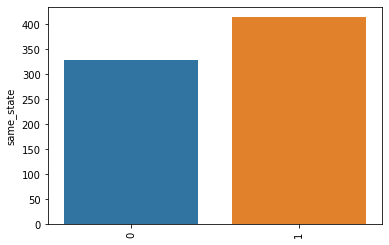

graph for python_yn; Total = 2


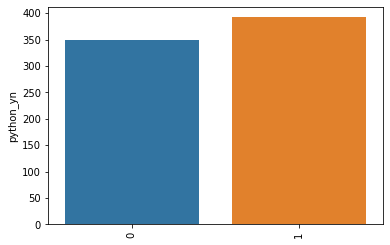

graph for r_yn; Total = 1


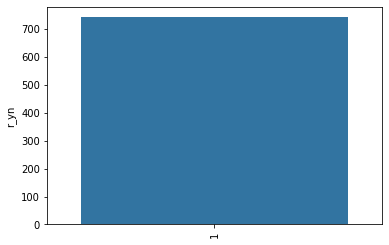

graph for spark_yn; Total = 2


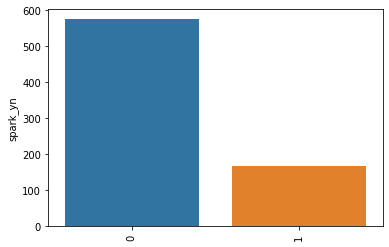

graph for aws_yn; Total = 2


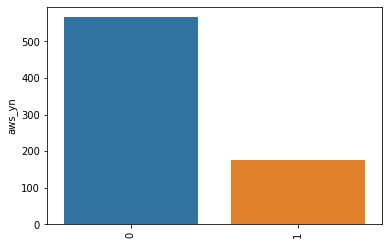

graph for excel_yn; Total = 2


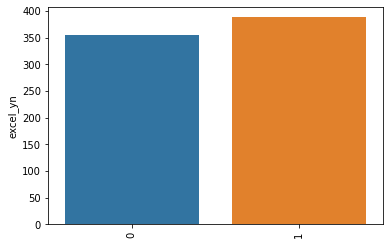

graph for job_simp; Total = 6


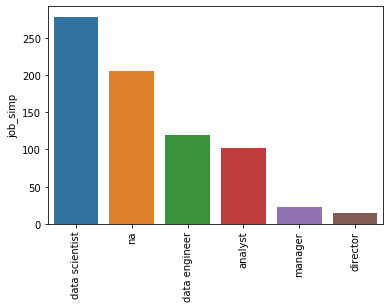

graph for seniority; Total = 3


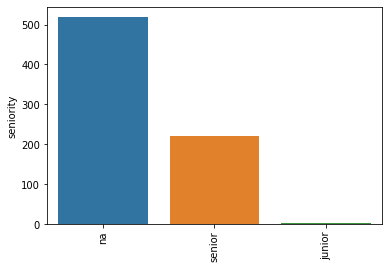

In [178]:
for i in df_cat:
    cat_num = df_cat[i].value_counts() 
    print("graph for %s; Total = %d" %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation =90)
    plt.show()

graph for Location; Total = 20


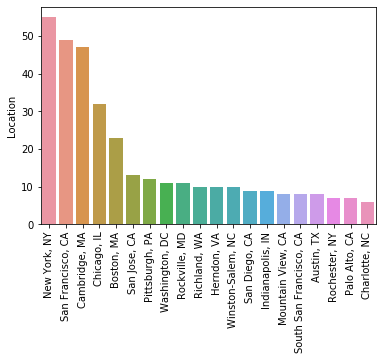

graph for Headquarters; Total = 20


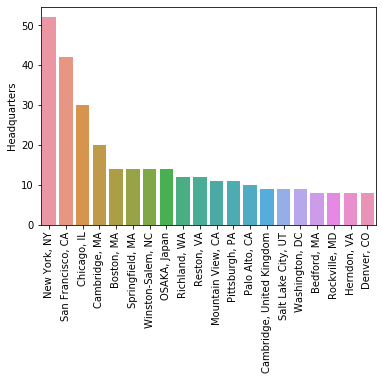

graph for company_txt; Total = 20


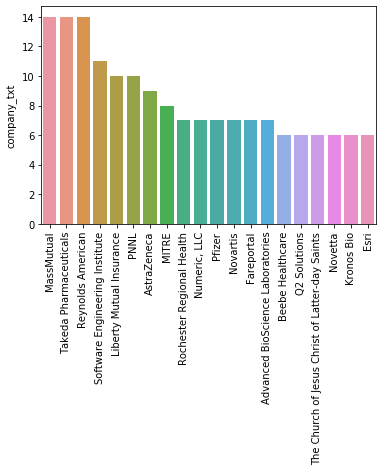

In [183]:
for i in df_cat[["Location", "Headquarters", "company_txt"]]:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s; Total = %d" %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation =90)
    plt.show()

In [184]:
pd.pivot_table(df, index = "job_simp", values = "average_salary")

,average_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
na,89.293689


In [185]:
pd.pivot_table(df, index = ["job_simp", "seniority"], values = "average_salary")

average_salary
job_simp       seniority                
analyst        junior          53.250000
               na              61.308219
               senior          79.092593
data engineer  na              96.701220
               senior         124.689189
data scientist junior         106.500000
               na             107.043011
               senior         138.956522
director       na             168.607143
manager        na              84.022727
na             na              78.757042
               senior         112.671875

In [188]:
pd.pivot_table(df, index = ["job_state", "job_simp"], values = "average_salary").sort_values("average_salary", ascending = False)

,,average_salary
job_state,job_simp,
IL,director,221.750000
NJ,director,161.500000
DC,data scientist,149.000000
CA,data scientist,142.522059
UT,data scientist,140.500000
...,...,...
MO,manager,40.500000
CO,analyst,29.500000
DE,na,27.500000


In [190]:
pd.pivot_table(df, index = ["job_state", "job_simp"], values = "average_salary").sort_values("job_state", ascending = False)

average_salary
job_state job_simp                      
WI        na                   54.000000
          data scientist      113.500000
          analyst              58.833333
WA        na                   97.500000
          data scientist       99.764706
...                                  ...
AZ        analyst              55.000000
          na                  124.500000
AL        na                   43.750000
          data engineer        65.000000
          analyst              62.200000

[108 rows x 1 columns]

In [194]:
pd.options.display.max_rows
pd.set_option("display.max_rows", None)

In [196]:
pd.pivot_table(df, index = ["job_state", "job_simp"], values = "average_salary", aggfunc = "count").sort_values("job_state", ascending = False)

average_salary
job_state job_simp                      
WI        na                           4
          data scientist               3
          analyst                      3
WA        na                           1
          data scientist              17
          analyst                      3
VA        na                           7
          data scientist              18
          data engineer               10
          analyst                      6
UT        data engineer                3
          analyst                      4
          data scientist               3
TX        na                           7
          data scientist              13
          data engineer                8
TN        data scientist               1
          data engineer               10
          analyst                      2
SC        na                           1
RI        analyst                      1
PA        data scientist               6
          data engineer                1
          analyst                      8
          manager                      3
          na                          15
OR        data scientist               3
          data engineer                1
OH        na                           3
          data scientist               7
          analyst                      4
NY        na                          14
          data scientist              40
          data engineer                4
          analyst                     14
NM        data scientist               3
NJ        data scientist               4
          analyst                      6
          data engineer                2
          manager                      2
          director                     2
          na                           1
NE        na                           4
NC        na                          12
          data scientist               3
          data engineer                6
MO        na                           3
          manager                      1
          data scientist               3
          analyst                      2
MN        data engineer                1
          analyst                      1
MI        manager                      2
          data scientist               4
MD        na                          16
          data scientist              13
          data engineer                3
          analyst                      3
MA        na                          46
          manager                      5
          director                     6
          data scientist              30
          data engineer               12
          analyst                      4
LA        analyst                      1
          data engineer                2
          na                           1
KY        na                           4
          data scientist               2
KS        na                           3
IN        na                           4
          data scientist               2
          data engineer                4
IL        analyst                      3
          na                           8
          director                     6
          data scientist              15
          data engineer                8
ID        analyst                      2
IA        analyst                      2
          data engineer                3
GA        data scientist               3
          na                           3
FL        data scientist               7
          data engineer                3
          analyst                      6
DE        na                           6
DC        data scientist               5
          data engineer                4
          analyst                      2
CT        data scientist               2
          na                           3
CO        data engineer                3
          analyst                      1
          na                           4
          data scientist               3
CA      

In [199]:
pd.pivot_table(df[df.job_simp == "data scientist"], index = "job_state", values = "average_salary").sort_values("average_salary", ascending = False)

,average_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [200]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [205]:
df_pivots = df[["Rating",'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors','python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'num_comp','hourly', 'employer_provided', "average_salary"]]

In [208]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = "average_salary").sort_values("average_salary", ascending = False))

Rating
        average_salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 3.3        101.858974
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286
Type of ownership
                                average_salary
Type of ownership                             
-1                                  117.500000
Company - Public                    110.893782
Subsidiary or Business Segme

ValueError: Grouper for 'average_salary' not 1-dimensional

In [210]:
pd.pivot_table(df_pivots, index = "Revenue", columns = "python_yn", values = "average_salary", aggfunc = "count")

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0
